In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
breast_cancer = load_breast_cancer()

features = breast_cancer.data
target = breast_cancer.target

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.33)

dtr = DecisionTreeClassifier()



In [2]:
simulate_blocks = 100000

In [3]:
#dtr.fit(train_features, train_target)

In [4]:
model_path = "breast-cancer.model"
# Save the model
import pickle
# with open(model_path, 'wb') as handle:
#     pickle.dump(dtr, handle)
with open(model_path, 'rb') as handle:
    dtr = pickle.load(handle)

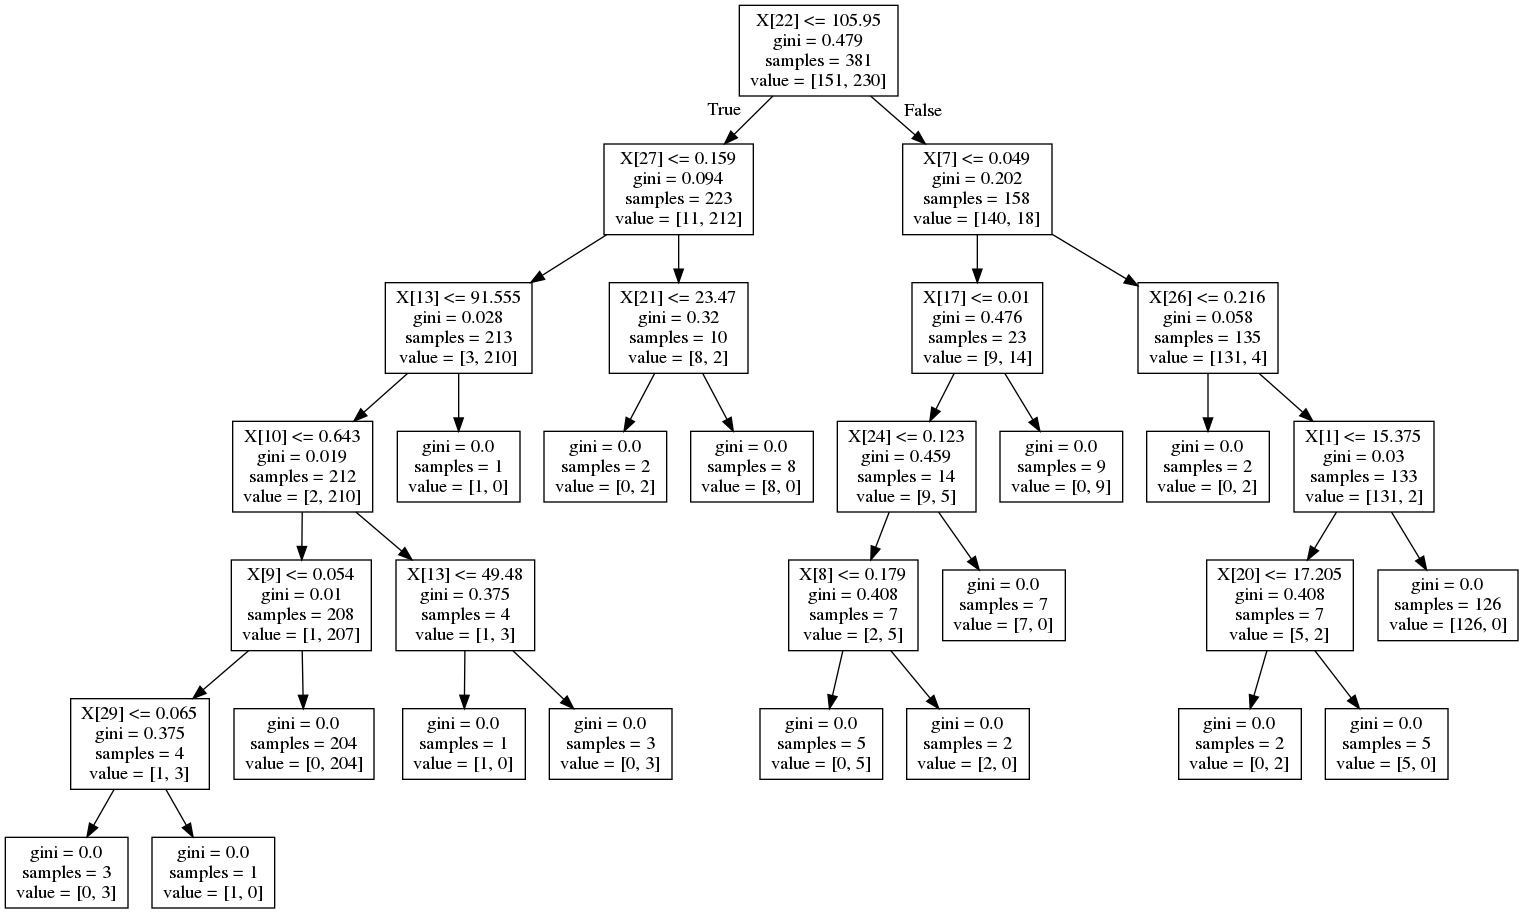

In [5]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(dtr)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [6]:
from hummingbird.ml import convert, load
hb_model = convert(dtr, 'pytorch')

In [7]:

features = np.tile(features, (simulate_blocks, 1))

In [8]:
%%timeit -r 3
# Run predictions on CPU
hb_model.predict(features)

13.6 s ± 41.2 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [9]:
# Run predictions on GPU
hb_model.to('cuda')

In [10]:
%%timeit -r 3
hb_model.predict(features)

2.89 s ± 598 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)
